#Proyecto Final
## Tema: Modelo de cálculo del precio de venta de viviendas

### Estudiante:
Jose Pablo Barrantes Jiménez

##Objetivo:
Desarrollar uno o varios modelos para calcular el precio de venta de viviendas utilizando técnicas de Data Mining y Machine Learning.

##Metodología:

* Fase conceptual del modelo CRISP-DM.
* Minería de reglas de asociación, clasificación y agrupación en clústeres.
* Minería predictiva.
* Análisis de datos: estadística descriptiva, visualización de datos.
* Selección y preparación de datos: limpieza, integración, transformación y reducción dimensional.
* Desarrollo de modelos: selección, entrenamiento y evaluación de modelos de aprendizaje supervisado y no supervisado.
* Optimización de modelos: ajuste de hiperparámetros y validación cruzada para mejorar el rendimiento de los modelos.


##Resultados esperados:

* Modelo/s ideal/es para calcular el precio de venta de viviendas.
* Segmentación del mercado inmobiliario.
* Identificación de tendencias en el mercado.
* Recomendaciones para mejorar el negocio.
* Análisis comparativo de diferentes modelos: evaluación del desempeño de múltiples modelos y selección del mejor.
* Reporte detallado: presentación de hallazgos, metodologías utilizadas y conclusiones finales.

##Recursos:

* Dataset "House_Prices_Advanced.csv" y "SalePrices.csv".
* Modelo CRISP-DM.
* Técnicas de Data Mining.
* Modelos Machine Learning
* Estadística descriptiva.
* Herramientas de Machine Learning: scikit-learn, TensorFlow, Keras, etc.
* Software de visualización: Matplotlib, Seaborn, etc.
* Entorno de desarrollo: Jupyter Notebook, Python.

#Parte 1
* Implementación de librerías
* Conexión con Google Drive
* Establecimiento de rutas para trabajar con los datasets.
* Crear el DataFrame a partir del archivo CSV

In [194]:
from google.colab import drive
import os
import random
from math import sqrt

import numpy as np
from numpy.random import randn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go


In [195]:
drive.mount('/content/drive')

mainpath = "/content/drive/MyDrive/Colab Notebooks/Trabajos Data Science/Proyectos/JPBJ_Final_Project/DataSet"
filename = "House_Prices_Advanced.csv"
fullpath = os.path.join(mainpath, filename)
df1 = pd.read_csv(fullpath)

filename = "SalePrices.csv"
fullpath = os.path.join(mainpath, filename)
df2 = pd.read_csv(fullpath)

df2.drop(columns=['Id'], inplace=True)

original_df = pd.concat([df1, df2], axis=1)
original_df.head()
df = original_df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parte 2 (Data Mining)
* Segmentar el DataSet por partes específicas dependiendo del tipo de vivienda:
 * Características físicas de la vivienda
 * Características del vecindario
* Limpieza de datos: Eliminar duplicados, corregir errores, tratar valores atípicos, NaN, etc.
* Transformación de datos: Convertir tipos de datos, aplicar funciones a columnas, crear nuevas características, etc.


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Segmentación del DataSet

Se tomarán las características que se consideren meramente esenciales para procesarlas y trabajarlas. En este caso, se seleccionarán las características [ LotArea, 1stFlrSF, 2ndFlrSF, GrLivArea, OpenPorchSF, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GarageArea, Street, SalePrice ]

In [197]:
selected_features = ["LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "OpenPorchSF", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "GarageArea", "Street", "SalePrice" ]
df = df[selected_features]
df.head()

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Street,SalePrice
0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730.0,Pave,169277.052498
1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312.0,Pave,187758.393989
2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482.0,Pave,183583.683570
3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470.0,Pave,179317.477511
4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506.0,Pave,150730.079977


## Tratamiento de Nulos

In [198]:
df.isnull().sum()

LotArea         0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
OpenPorchSF     0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageArea      1
Street          0
SalePrice       0
dtype: int64

In [199]:
df['GarageArea'].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [200]:
df.loc[df['GarageArea'].isnull(), 'GarageArea'] = df['GarageArea'].mean()

In [201]:
df.isnull().sum().sum()

0

## Tratamiento de la columna categórica

In [202]:
df['Street'].value_counts()

Street
Pave    1453
Grvl       6
Name: count, dtype: int64

In [203]:
df['Street'] = df['Street'].replace({'Pave': 1, 'Grvl': 0})
df = df.rename(columns={'Street': 'Paved'})
df['Paved'].value_counts()

Paved
1    1453
0       6
Name: count, dtype: int64

## Tratamiento de valores atípicos u outliers

Como referencia principal usaremos el valor de los cuartiles principalmente el primer cuartil 25% y el valor minimo, y el 3 cuartil y el valor maximo, para evitar mucha dispersion en los datos

In [204]:
def IdentifyOutliers(df, column):
    plt.title(f"Boxplot de la columna {column}")
    plt.xlabel(column)
    plt.boxplot(df[column],medianprops=dict(color="red"))
    plt.show()

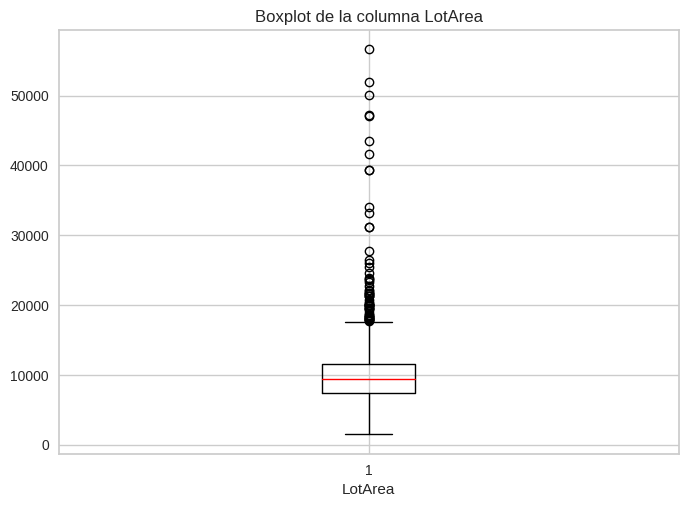

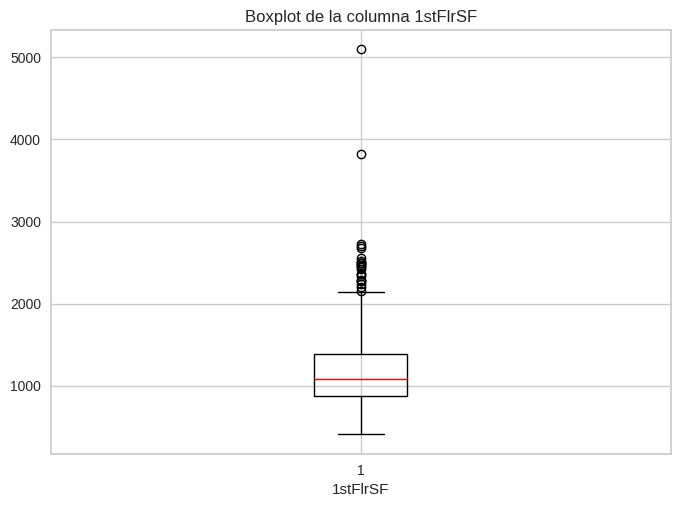

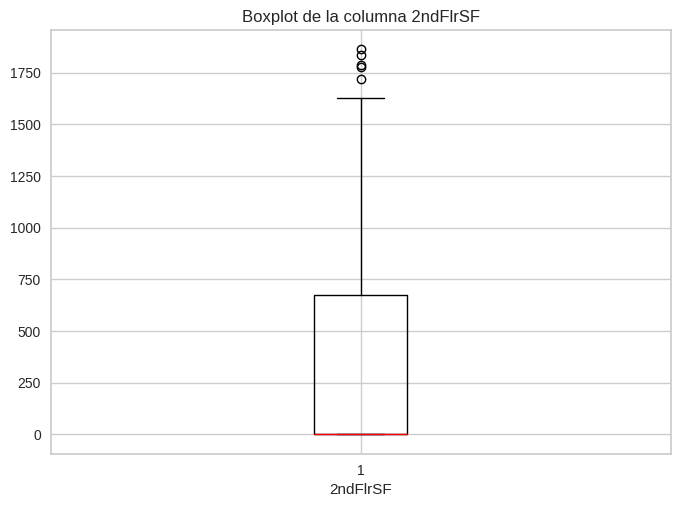

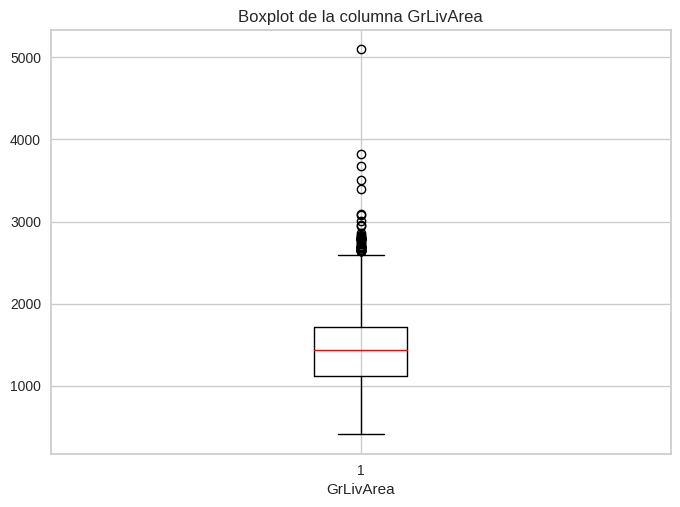

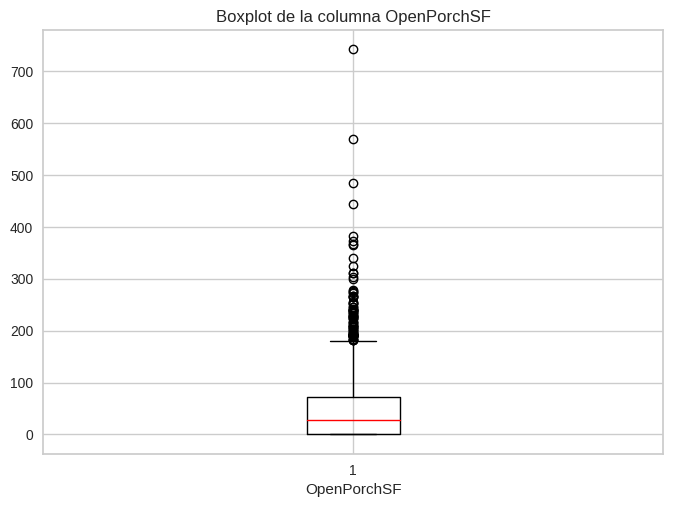

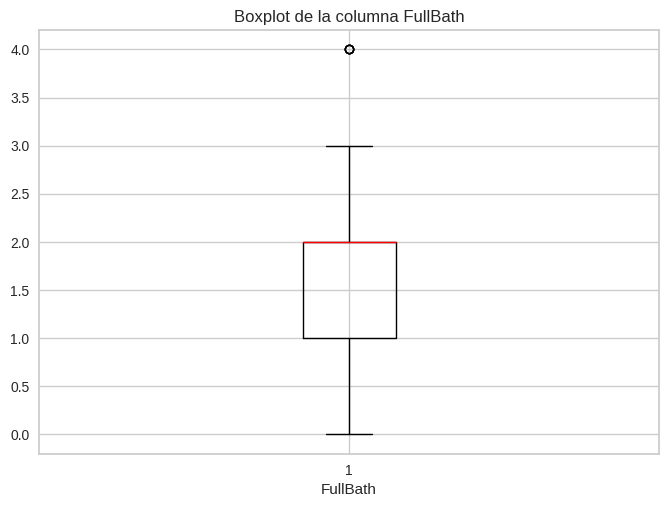

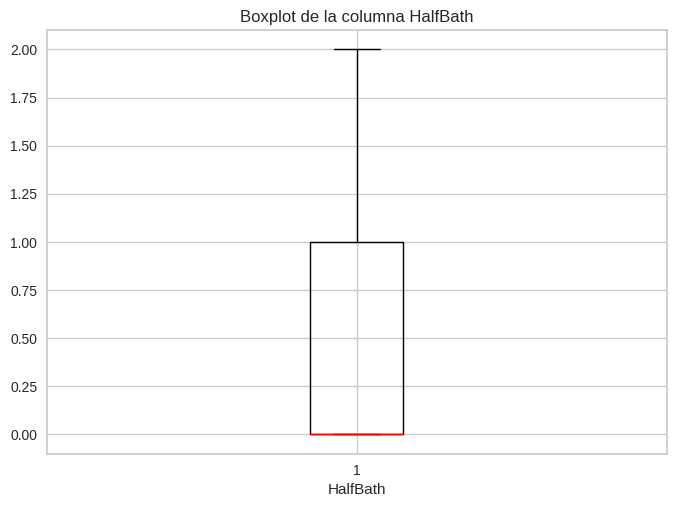

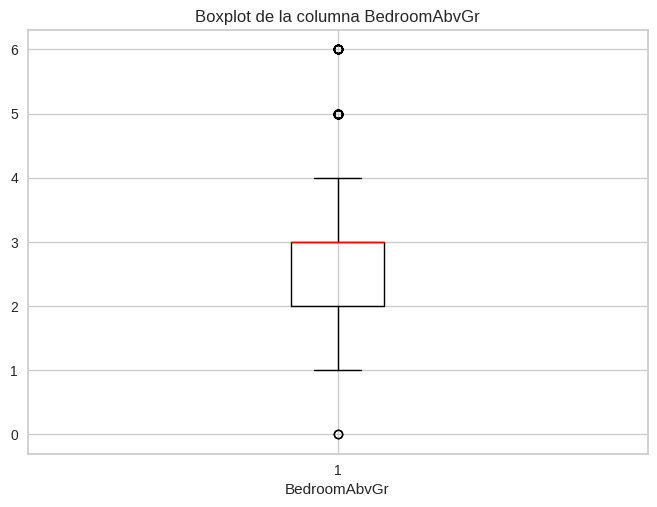

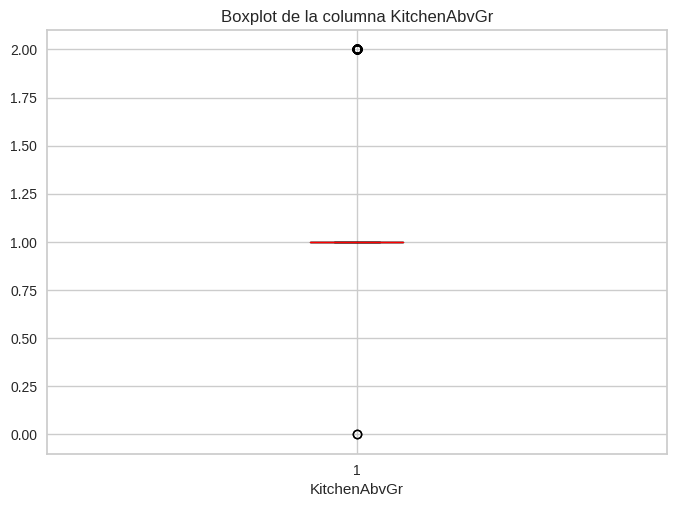

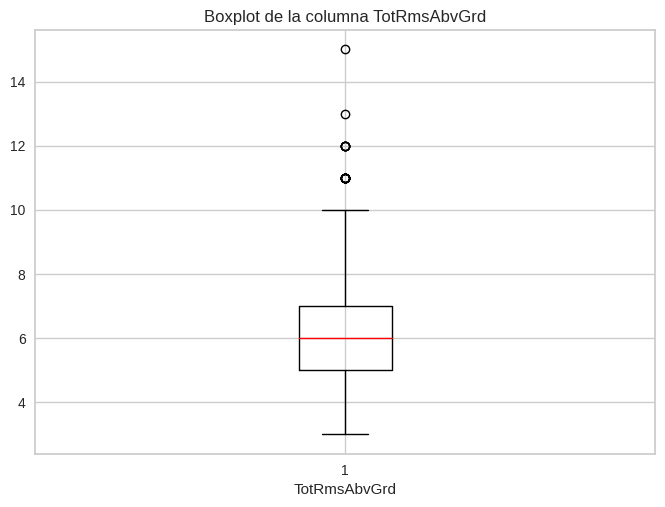

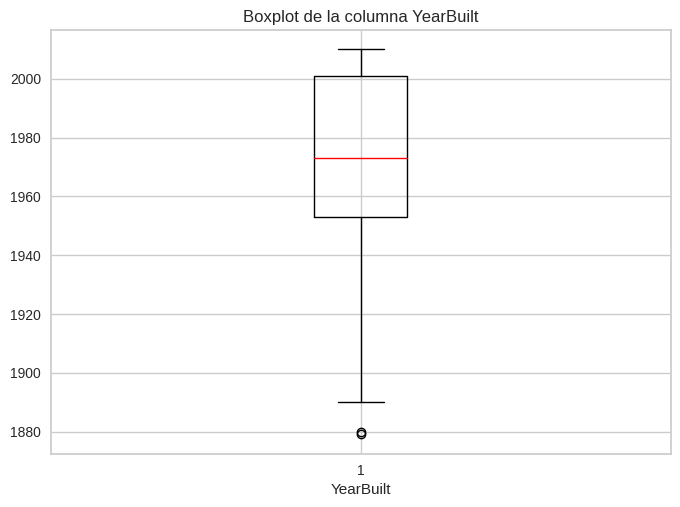

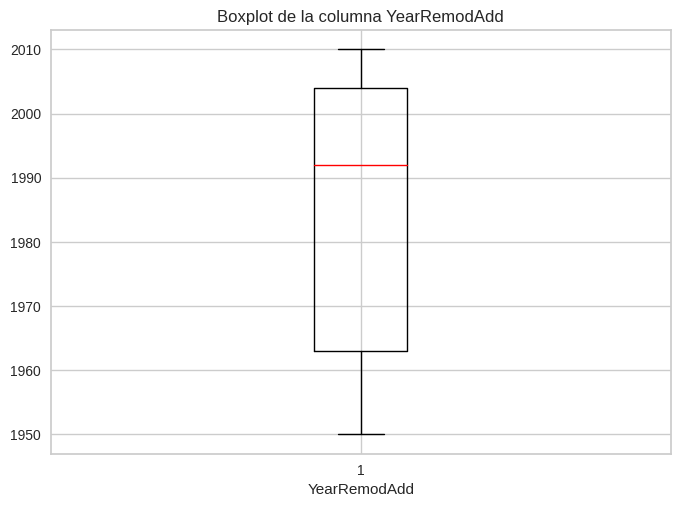

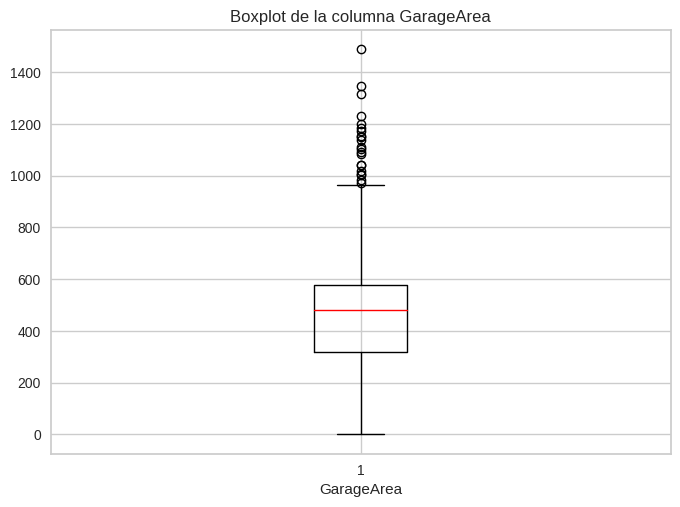

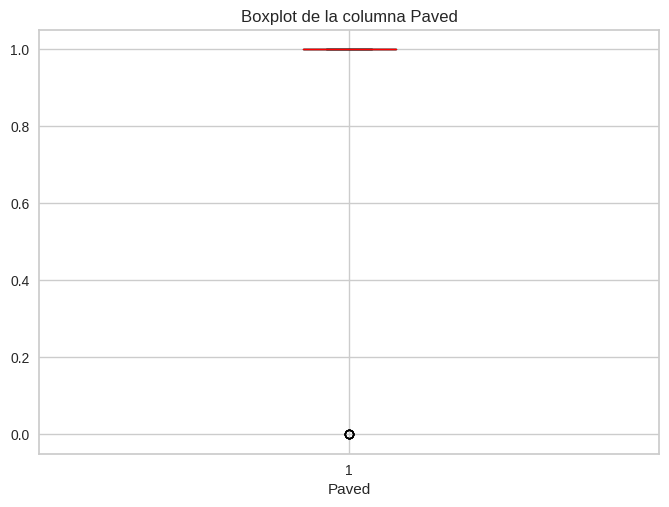

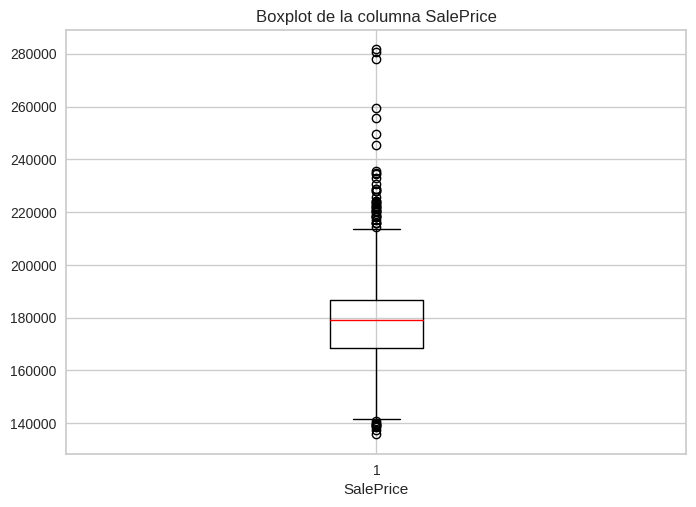

In [205]:
for col in df.columns:
  IdentifyOutliers(df, col)
  print()

In [206]:
def RemoveOutliers(df, column, min_value, max_value, min_random_gen):
  outliers = df[(df[column] < min_value) | (df[column] > max_value)]
  random_values = np.random.uniform(min_random_gen, max_value, size=len(outliers))
  df.loc[outliers.index, column] = random_values
  IdentifyOutliers(df, column)
  print(df[column].describe())

In [207]:
df['GarageArea'].describe()

count    1459.000000
mean      472.768861
std       216.974165
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

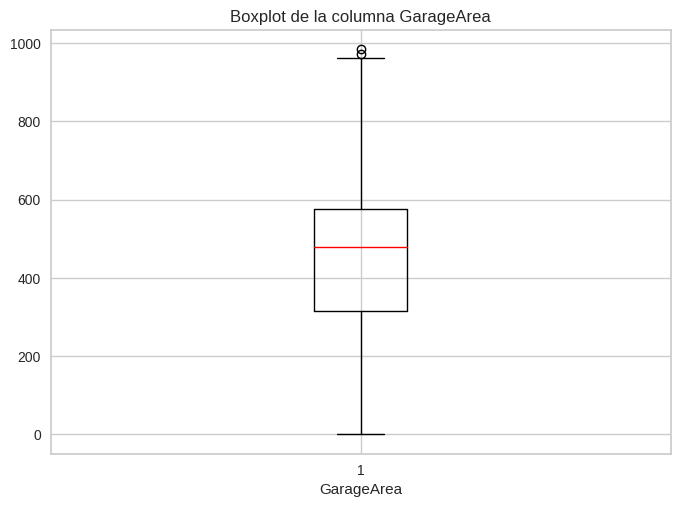

count    1459.000000
mean      464.292668
std       203.823332
min         0.000000
25%       315.000000
50%       478.000000
75%       576.000000
max       984.000000
Name: GarageArea, dtype: float64


In [208]:
RemoveOutliers(df, 'GarageArea', 0, 1000, 100)

In [209]:
df['LotArea'].describe()

count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64

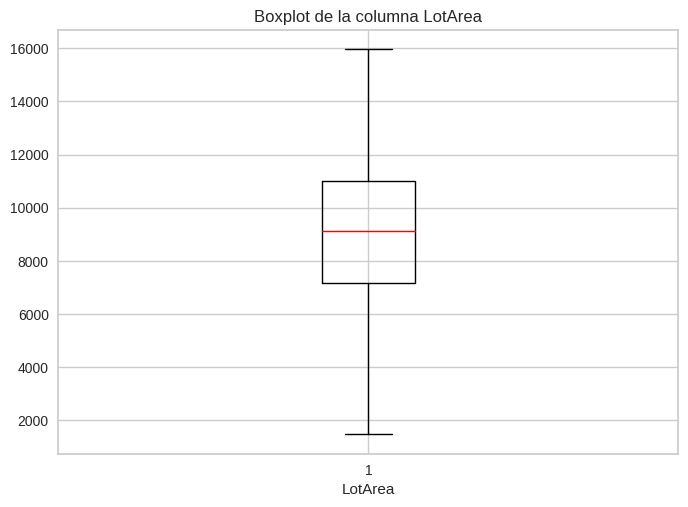

count     1459.000000
mean      8955.273550
std       3174.114173
min       1470.000000
25%       7178.000000
50%       9109.000000
75%      11024.500000
max      15957.000000
Name: LotArea, dtype: float64


In [210]:
RemoveOutliers(df, 'LotArea', 1470, 16000, 1470)

In [211]:
df['1stFlrSF'].describe()

count    1459.000000
mean     1156.534613
std       398.165820
min       407.000000
25%       873.500000
50%      1079.000000
75%      1382.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

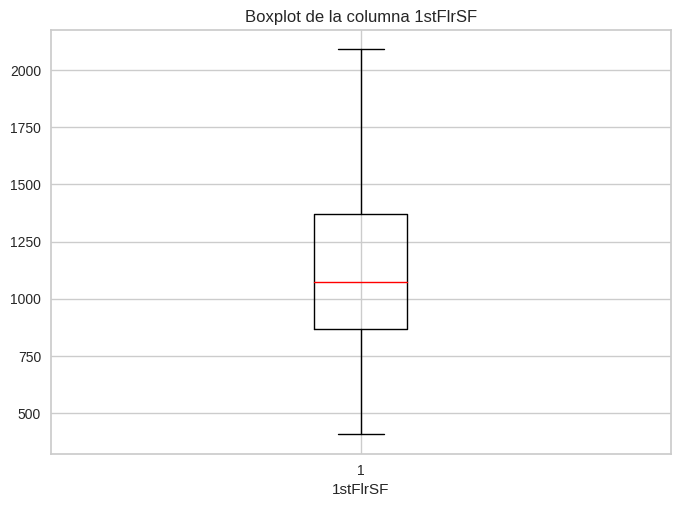

count    1459.000000
mean     1133.936099
std       350.353432
min       407.000000
25%       868.000000
50%      1072.000000
75%      1369.500000
max      2090.236831
Name: 1stFlrSF, dtype: float64


In [212]:
RemoveOutliers(df, '1stFlrSF', 407, 2100, 407)

In [213]:
df['2ndFlrSF'].describe()

count    1459.000000
mean      325.967786
std       420.610226
min         0.000000
25%         0.000000
50%         0.000000
75%       676.000000
max      1862.000000
Name: 2ndFlrSF, dtype: float64

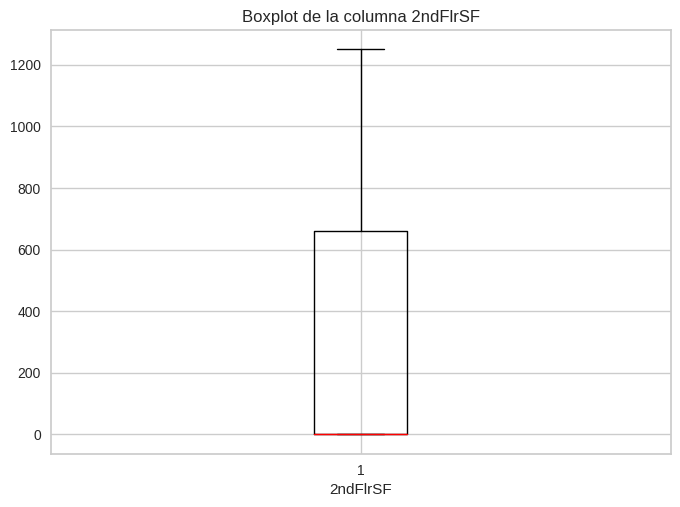

count    1459.000000
mean      302.891853
std       385.369227
min         0.000000
25%         0.000000
50%         0.000000
75%       660.500000
max      1250.000000
Name: 2ndFlrSF, dtype: float64


In [214]:
RemoveOutliers(df, '2ndFlrSF', 0, 1250, 0)

Reescripción de la columna GrLivArea en el DataFrame, asegurando que sea la suma de las columnas 1stFlrSF y 2ndFlrSF.

In [215]:
df["GrLivArea"] = df['1stFlrSF'] + df['2ndFlrSF']

In [216]:
df['GrLivArea'].describe()

count    1459.000000
mean     1436.827952
std       424.003435
min       407.000000
25%      1101.000000
50%      1405.000000
75%      1683.500000
max      2956.000000
Name: GrLivArea, dtype: float64

In [217]:
df['OpenPorchSF'].describe()

count    1459.000000
mean       48.313914
std        68.883364
min         0.000000
25%         0.000000
50%        28.000000
75%        72.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

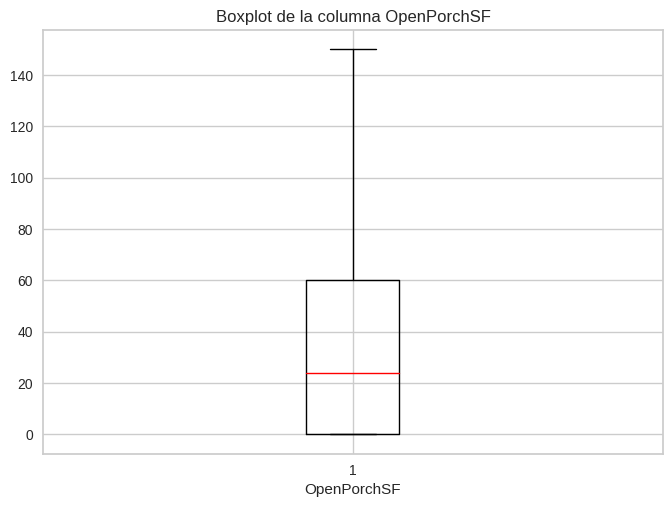

count    1459.000000
mean       35.598647
std        41.175060
min         0.000000
25%         0.000000
50%        24.000000
75%        60.000000
max       150.000000
Name: OpenPorchSF, dtype: float64


In [218]:
RemoveOutliers(df, 'OpenPorchSF', 0, 150, 0)

In [219]:
df['BedroomAbvGr'].describe()

count    1459.000000
mean        2.854010
std         0.829788
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64

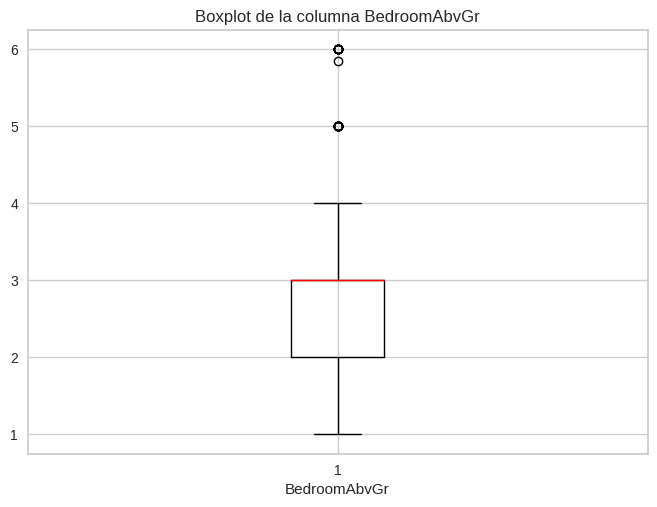

count    1459.000000
mean        2.858953
std         0.827657
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64


In [220]:
RemoveOutliers(df, 'BedroomAbvGr', 1, 6, 1)

In [221]:
df["FullBath"].describe()

count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64

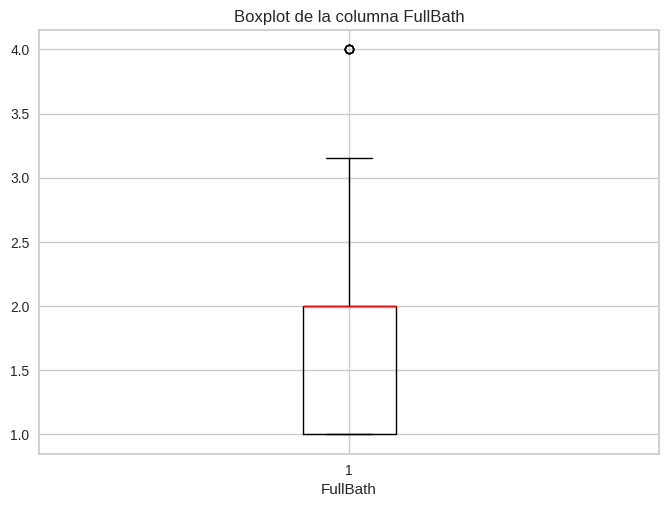

count    1459.000000
mean        1.575762
std         0.552926
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64


In [222]:
RemoveOutliers(df, 'FullBath', 1, 4, 1)

In [223]:
df['KitchenAbvGr'] = 1

In [224]:
df

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11622.000000,896.0,0.0,896.0,0.0,1.0,0,2.0,1,5,1961,1961,730.0,1,169277.052498
1,14267.000000,1329.0,0.0,1329.0,36.0,1.0,1,3.0,1,6,1958,1958,312.0,1,187758.393989
2,13830.000000,928.0,701.0,1629.0,34.0,2.0,1,3.0,1,6,1997,1998,482.0,1,183583.683570
3,9978.000000,926.0,678.0,1604.0,36.0,2.0,1,3.0,1,7,1998,1998,470.0,1,179317.477511
4,5005.000000,1280.0,0.0,1280.0,82.0,2.0,0,2.0,1,5,1992,1992,506.0,1,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936.000000,546.0,546.0,1092.0,0.0,1.0,1,3.0,1,5,1970,1970,0.0,1,167081.220949
1455,1894.000000,546.0,546.0,1092.0,24.0,1.0,1,3.0,1,6,1970,1970,286.0,1,164788.778231
1456,6799.295826,1224.0,0.0,1224.0,0.0,1.0,0,4.0,1,7,1960,1996,576.0,1,219222.423400
1457,10441.000000,970.0,0.0,970.0,32.0,1.0,0,3.0,1,6,1992,1992,0.0,1,184924.279659


Acá se termina la limpieza y tratamiento de los datos crudos. Se procederá a hacer un análisis de estos datos para generar un nuevo dataset clonado con la finalidad de entrenar los modelos de machine learning y que estos ofrezcan mejores resultados.

## Análisis

Se analizarán algunas características del dataset crudo para que, al hacer el dataset clonado, este sea lo más similar y coherente a los datos originales, evitando la generación de muchos valores aleatorios.

In [225]:
df_analysis = df.copy()

In [226]:
df_contains_0s = df_analysis.loc[:, (df_analysis == 0).any()]
df_contains_0s

,2ndFlrSF,OpenPorchSF,HalfBath,GarageArea,Paved
0,0.0,0.0,0,730.0,1
1,0.0,36.0,1,312.0,1
2,701.0,34.0,1,482.0,1
3,678.0,36.0,1,470.0,1
4,0.0,82.0,0,506.0,1
...,...,...,...,...,...
1454,546.0,0.0,1,0.0,1
1455,546.0,24.0,1,286.0,1
1456,0.0,0.0,0,576.0,1
1457,0.0,32.0,0,0.0,1


In [227]:
print("Minimums")
for column in df_contains_0s.columns:
  df_no_zeros = df_contains_0s[df_contains_0s[column] > 0]
  print(df_no_zeros.min())
  print()

print("Maximums")
print(df_no_zeros.max())

Minimums
2ndFlrSF       0.391393
OpenPorchSF    0.000000
HalfBath       0.000000
GarageArea     0.000000
Paved          0.000000
dtype: float64

2ndFlrSF       0.000000
OpenPorchSF    0.972188
HalfBath       0.000000
GarageArea     0.000000
Paved          0.000000
dtype: float64

2ndFlrSF       0.0
OpenPorchSF    0.0
HalfBath       1.0
GarageArea     0.0
Paved          0.0
dtype: float64

2ndFlrSF         0.0
OpenPorchSF      0.0
HalfBath         0.0
GarageArea     100.0
Paved            0.0
dtype: float64

2ndFlrSF       0.0
OpenPorchSF    0.0
HalfBath       0.0
GarageArea     0.0
Paved          1.0
dtype: float64

Maximums
2ndFlrSF       1250.0
OpenPorchSF     150.0
HalfBath          2.0
GarageArea      984.0
Paved             1.0
dtype: float64


Con esos valores, podemos determinar la cantidad de mínimos y máximos que poseen las características que contienen ceros (0).

In [228]:
range_min = {
    "LotArea": df["LotArea"].min(),
    "1stFlrSF": df["1stFlrSF"].min(),
    "2ndFlrSF": 15,
    "GrLivArea":df["GrLivArea"].min(),
    "OpenPorchSF": 1,
    "FullBath": df["FullBath"].min(),
    "HalfBath": 1,
    "BedroomAbvGr": df["BedroomAbvGr"].min(),
    "KitchenAbvGr": 1,
    "TotRmsAbvGrd": df["TotRmsAbvGrd"].min(),
    "YearBuilt": df["YearBuilt"].min(),
    "YearRemodAdd": df["YearRemodAdd"].min(),
    "GarageArea": 100,
    "Paved": 0,
    "SalePrice": df["SalePrice"].min()
}

range_max = {column: df[column].max() for column in df.columns}


## Creación del dataset clonado para uso en el entrenamiento de modelos

In [229]:
def generate_cloned_dataset(df, noise_factor=0.01, range_min=None, range_max=None):
    df_clone = df.copy()

    for column in df_clone.select_dtypes(include=[np.number]).columns:
        if column in ["GarageArea", "2ndFlrSF", 'OpenPorchSF']:
            df_clone[column] = df_clone[column].apply(
                lambda x: x if x == 0 else int(x * (1 + np.random.uniform(-noise_factor, noise_factor))))
        elif column in ['Paved', 'HalfBath']:
            df_clone[column] = df_clone[column].apply(
                lambda x: x if x == 0 else max(1, int(x * (1 + np.random.uniform(-noise_factor, noise_factor)))))
        else:
            noise = np.random.uniform(-noise_factor, noise_factor, size=df_clone[column].shape)
            df_clone[column] = (df_clone[column] * (1 + noise)).astype(int)

    if range_min:
        for column, min_val in range_min.items():
            if column in df_clone.columns:
                if column in ["GarageArea", "2ndFlrSF", 'OpenPorchSF']:
                    df_clone[column] = df_clone[column].apply(lambda x: x if x == 0 else max(x, min_val))
                elif column not in ['Paved', 'HalfBath']:
                    df_clone[column] = np.maximum(df_clone[column], min_val)

    if range_max:
        for column, max_val in range_max.items():
            if column in df_clone.columns and column not in ['Paved', 'HalfBath']:
                df_clone[column] = np.minimum(df_clone[column], max_val)

    return df_clone

In [230]:
df_cloned = generate_cloned_dataset(df, range_min=range_min, range_max=range_max)
df_cloned

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11613.0,900.0,0.0,897.0,0.0,1.0,0,1.0,1,5,1974,1950,732.0,1,168962.0
1,14306.0,1338.0,0.0,1317.0,35.0,1.0,1,3.0,1,6,1964,1950,313.0,1,188531.0
2,13913.0,935.0,701.0,1634.0,33.0,1.0,1,3.0,1,6,1994,2009,477.0,1,183114.0
3,9942.0,922.0,674.0,1611.0,36.0,1.0,1,2.0,1,7,2004,2010,472.0,1,179705.0
4,4991.0,1270.0,0.0,1274.0,82.0,2.0,0,2.0,1,4,1982,2005,501.0,1,150517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1948.0,540.0,546.0,1094.0,0.0,1.0,1,3.0,1,5,1967,1970,0.0,1,167399.0
1455,1878.0,542.0,541.0,1096.0,23.0,1.0,1,2.0,1,6,1966,1970,286.0,1,165746.0
1456,6818.0,1234.0,0.0,1223.0,0.0,1.0,0,3.0,1,7,1962,1984,576.0,1,219393.0
1457,10422.0,973.0,0.0,976.0,31.0,1.0,0,3.0,1,5,1979,1991,0.0,1,184494.0


Se aplicará un bucle para aumentar la cantidad de datos exponencialmente, duplicando el tamaño del dataset clonado en cada iteración.

**Nota:**
Este código es modificable y adaptable, y a medida que se aumenta la cantidad de datos se obtienen mejores resultados, pero se requiere más tiempo de entrenamiento y recursos computacionales.

In [231]:
for i in range(4):
  df_cloned2 = generate_cloned_dataset(df_cloned, noise_factor=0.01, range_min=range_min, range_max=range_max)
  df_cloned = pd.concat([df_cloned, df_cloned2], axis=0)
  print(df_cloned.shape)

(2918, 15)
(5836, 15)
(11672, 15)
(23344, 15)


In [232]:
df_cloned

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11613.0,900.0,0.0,897.0,0.0,1.0,0,1.0,1,5,1974,1950,732.0,1,168962.0
1,14306.0,1338.0,0.0,1317.0,35.0,1.0,1,3.0,1,6,1964,1950,313.0,1,188531.0
2,13913.0,935.0,701.0,1634.0,33.0,1.0,1,3.0,1,6,1994,2009,477.0,1,183114.0
3,9942.0,922.0,674.0,1611.0,36.0,1.0,1,2.0,1,7,2004,2010,472.0,1,179705.0
4,4991.0,1270.0,0.0,1274.0,82.0,2.0,0,2.0,1,4,1982,2005,501.0,1,150517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1931.0,543.0,540.0,1080.0,0.0,1.0,1,2.0,1,3,1950,1996,0.0,1,165644.0
1455,1866.0,541.0,538.0,1089.0,21.0,1.0,1,1.0,1,5,1954,2001,280.0,1,164801.0
1456,6748.0,1242.0,0.0,1204.0,0.0,1.0,0,2.0,1,6,1974,1996,588.0,1,220412.0
1457,10415.0,966.0,0.0,972.0,29.0,1.0,0,1.0,1,3,2010,2005,0.0,1,182362.0


In [233]:
df_cloned['GrLivArea'] = df_cloned['1stFlrSF'] + df_cloned['2ndFlrSF']
df_cloned

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11613.0,900.0,0.0,900.0,0.0,1.0,0,1.0,1,5,1974,1950,732.0,1,168962.0
1,14306.0,1338.0,0.0,1338.0,35.0,1.0,1,3.0,1,6,1964,1950,313.0,1,188531.0
2,13913.0,935.0,701.0,1636.0,33.0,1.0,1,3.0,1,6,1994,2009,477.0,1,183114.0
3,9942.0,922.0,674.0,1596.0,36.0,1.0,1,2.0,1,7,2004,2010,472.0,1,179705.0
4,4991.0,1270.0,0.0,1270.0,82.0,2.0,0,2.0,1,4,1982,2005,501.0,1,150517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1931.0,543.0,540.0,1083.0,0.0,1.0,1,2.0,1,3,1950,1996,0.0,1,165644.0
1455,1866.0,541.0,538.0,1079.0,21.0,1.0,1,1.0,1,5,1954,2001,280.0,1,164801.0
1456,6748.0,1242.0,0.0,1242.0,0.0,1.0,0,2.0,1,6,1974,1996,588.0,1,220412.0
1457,10415.0,966.0,0.0,966.0,29.0,1.0,0,1.0,1,3,2010,2005,0.0,1,182362.0


# Parte 3 (Machine Learning)

Se utilizarán diferentes enfoques de Machine Learning para analizar y comprender los datos.
* Modelos de Machine Learning Supervisado:
  * Regresión Lineal
  * K-Nearest Neighbors (KNN)
  * Random Forest
  * Gradient Boosting Trees
  * Redes Neuronales Artificiales
* Modelos de Machine Learning No Supervisado:
  * Isolation Forest
  * K-Means
  * DBSCAN


## Regresión Lineal

Se analizará de forma manual y utilizando el algoritmo de scikit-learn.

In [234]:
df2 = df_cloned.copy()

Text(0, 0.5, 'SalePrice')

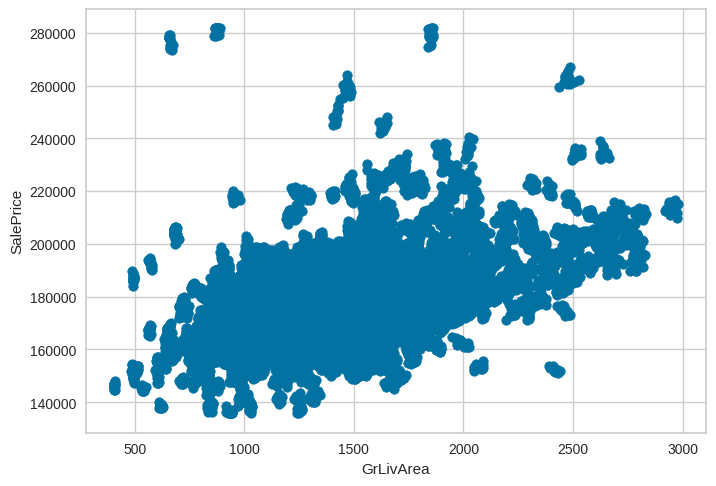

In [235]:
plt.scatter(df2['GrLivArea'], df2['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

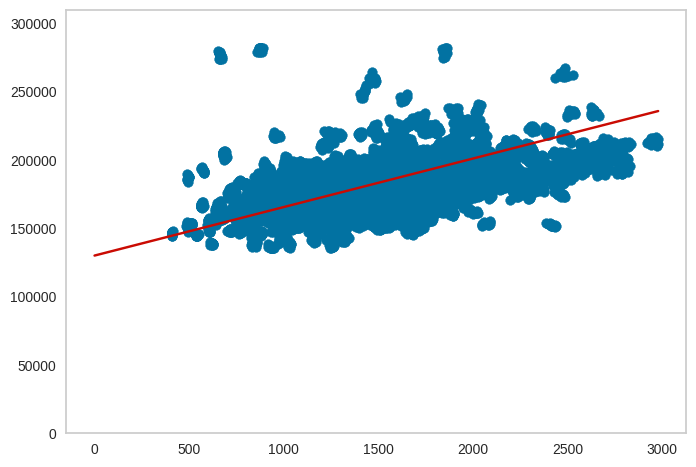

In [236]:
w = 35.5
b = 130000
x = np.linspace(0,df2['GrLivArea'].max(),100)
y = w*x + b
plt.scatter(df2['GrLivArea'], df2['SalePrice'])
plt.plot(x,y,'-r')
plt.ylim(0,df2['SalePrice'].max()*1.1)
plt.grid()
plt.show()

In [237]:
df2['Prediction'] = w * df2['GrLivArea'] + b
df2

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice,Prediction
0,11613.0,900.0,0.0,900.0,0.0,1.0,0,1.0,1,5,1974,1950,732.0,1,168962.0,161950.0
1,14306.0,1338.0,0.0,1338.0,35.0,1.0,1,3.0,1,6,1964,1950,313.0,1,188531.0,177499.0
2,13913.0,935.0,701.0,1636.0,33.0,1.0,1,3.0,1,6,1994,2009,477.0,1,183114.0,188078.0
3,9942.0,922.0,674.0,1596.0,36.0,1.0,1,2.0,1,7,2004,2010,472.0,1,179705.0,186658.0
4,4991.0,1270.0,0.0,1270.0,82.0,2.0,0,2.0,1,4,1982,2005,501.0,1,150517.0,175085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1931.0,543.0,540.0,1083.0,0.0,1.0,1,2.0,1,3,1950,1996,0.0,1,165644.0,168446.5
1455,1866.0,541.0,538.0,1079.0,21.0,1.0,1,1.0,1,5,1954,2001,280.0,1,164801.0,168304.5
1456,6748.0,1242.0,0.0,1242.0,0.0,1.0,0,2.0,1,6,1974,1996,588.0,1,220412.0,174091.0
1457,10415.0,966.0,0.0,966.0,29.0,1.0,0,1.0,1,3,2010,2005,0.0,1,182362.0,164293.0


In [238]:
df2["Error"] = df2["SalePrice"] - df2["Prediction"]
df2["Squared Error"] = df2["Error"] ** 2
df2[[ "SalePrice", "Prediction", "Error", "Squared Error"]].head()

,SalePrice,Prediction,Error,Squared Error
0,168962.0,161950.0,7012.0,49168144.0
1,188531.0,177499.0,11032.0,121705024.0
2,183114.0,188078.0,-4964.0,24641296.0
3,179705.0,186658.0,-6953.0,48344209.0
4,150517.0,175085.0,-24568.0,603586624.0


In [239]:
df2["Squared Error"].mean()

264930145.03882673

In [240]:
w = np.linspace(7, 40 , 7)
grid_error = pd.DataFrame(w, columns=["w"])
grid_error.head()

,w
0,7.0
1,12.5
2,18.0
3,23.5
4,29.0


In [241]:
def sum_error(w, df):
  df2 = df_cloned.copy()
  b = 130000
  df2['Prediction'] = df2['GrLivArea']*w + b
  df2['Error'] = df2['SalePrice'] - df2['Prediction']
  df2['Squared Error'] = df2['Error']**2
  return df2['Squared Error'].mean()

In [242]:
grid_error['Error'] = grid_error['w'].apply(lambda x: sum_error(x, df2))
grid_error.head()

,w,Error
0,7.0,1.768006e+09
1,12.5,1.195014e+09
2,18.0,7.573340e+08
3,23.5,4.549657e+08
4,29.0,2.879091e+08


Text(0, 0.5, 'Error')

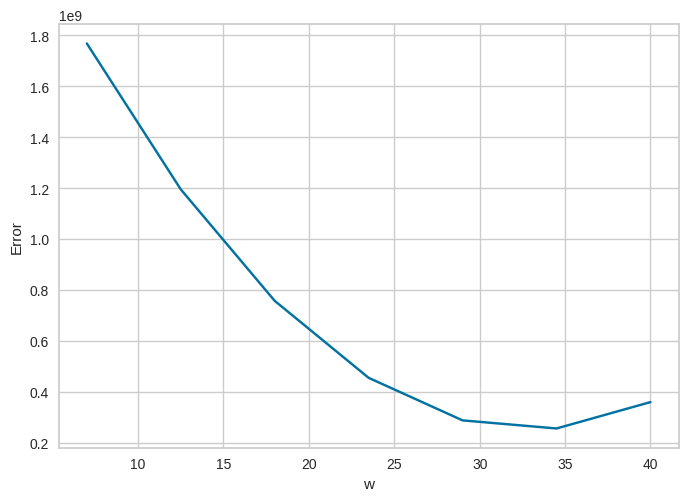

In [243]:
plt.plot(grid_error['w'], grid_error['Error'])
plt.xlabel('w')
plt.ylabel('Error')

In [244]:
grid_error[grid_error['Error'] == grid_error['Error'].min()]

,w,Error
5,34.5,2.561643e+08


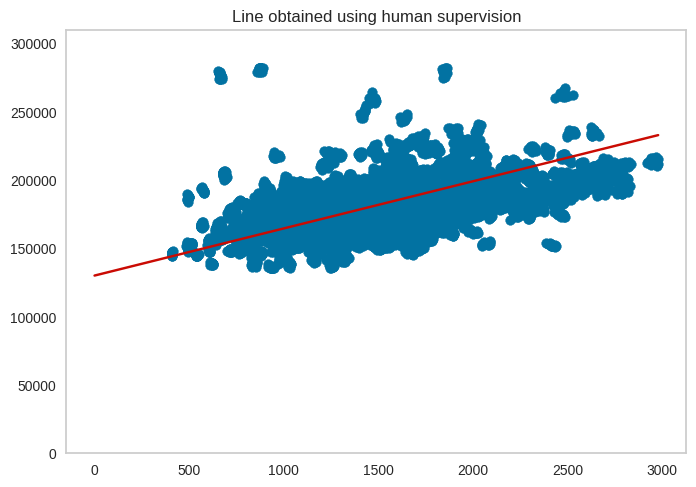

In [245]:
w = 34.5
b = 130000
x = np.linspace(0,df2['GrLivArea'].max(),100)
y = w*x + b
plt.title('Line obtained using human supervision')
plt.scatter(df2['GrLivArea'], df2['SalePrice'])
plt.plot(x,y,'-r')
plt.ylim(0,df2['SalePrice'].max()*1.1)
plt.grid()
plt.show()

Uso de Scikit-learn

In [246]:
df2 = df_cloned.copy()

In [247]:
x = np.array(df2['GrLivArea']).reshape((-1,1))
y = np.array(df2['SalePrice'])

model = LinearRegression()
model.fit(x, y)

print(f'Intercept (b): {model.intercept_}')
print(f'Slope (w): {model.coef_}')

Intercept (b): 152107.87509664262
Slope (w): [18.86328736]


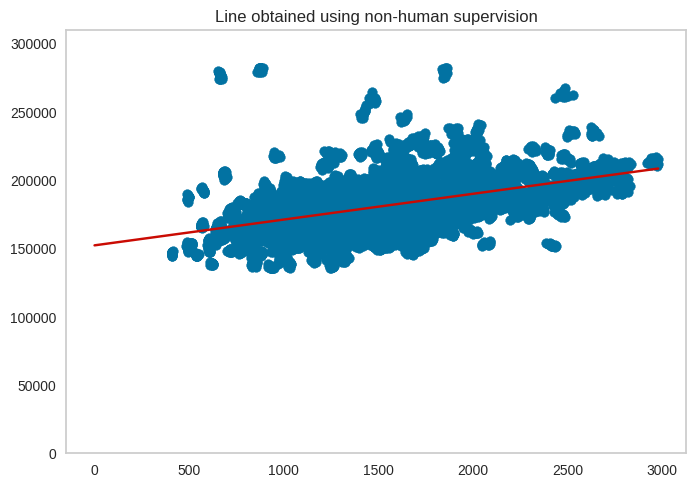

In [248]:
b = model.intercept_
w = model.coef_[0]
x = np.linspace(0,df2['GrLivArea'].max(),100)
y = w*x + b
plt.title('Line obtained using non-human supervision')
plt.scatter(df2['GrLivArea'], df2['SalePrice'])
plt.plot(x, y, '-r')
plt.ylim(0, df2['SalePrice'].max() * 1.1)
plt.grid()
plt.show()

Verificar la efectividad

In [249]:
df2['Prediction'] = df2["GrLivArea"] * w + b
df2["Difference"] = df2["SalePrice"] - df2["Prediction"]
df2["Absolute Difference"] = abs(df2["Difference"])

mse = mean_squared_error(df2['SalePrice'], df2['Prediction'])
mae = mean_absolute_error(df2['SalePrice'], df2['Prediction'])
r2 = r2_score(df2['SalePrice'], df2['Prediction'])
rmse = np.sqrt(mse)
effectiveness = r2 * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model effectiveness percentage: {effectiveness:.2f}%")

print()
print(df2[[column, 'SalePrice', 'Prediction', 'Difference', 'Absolute Difference']].head())
print()
print(df2["Absolute Difference"].describe())

Mean Squared Error (MSE): 212163155.11312166
Mean Absolute Error (MAE): 10528.429779382917
Coefficient of Determination (R2): 0.23142903452939667
Root Mean Squared Error (RMSE): 14565.821470590721
Model effectiveness percentage: 23.14%

   Paved  SalePrice     Prediction    Difference  Absolute Difference
0      1   168962.0  169084.833724   -122.833724           122.833724
1      1   188531.0  177346.953590  11184.046410         11184.046410
2      1   183114.0  182968.213224    145.786776           145.786776
3      1   179705.0  182213.681730  -2508.681730          2508.681730
4      1   150517.0  176064.250049 -25547.250049         25547.250049

count     23344.000000
mean      10528.429779
std       10065.766825
min           0.073992
25%        3787.890582
50%        8064.407827
75%       14439.709880
max      114854.671680
Name: Absolute Difference, dtype: float64


## K-Nearest Neighbors (KNN)

In [250]:
df3 = df_cloned.copy()

In [251]:
X = df3.drop('SalePrice', axis=1)
y = df3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [252]:
knn_model = KNeighborsRegressor()

params = {'n_neighbors': list(range(1, 15)),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan', 'chebyshev']}

grid_search = GridSearchCV(knn_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_neighbors = grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors: {best_neighbors}")

Optimal number of neighbors: 3


In [253]:
model_KNN = KNeighborsRegressor(n_neighbors=best_neighbors)
model_KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

      Original Values    Predictions
413          187640.0  184694.666667
514          153292.0  153840.333333
324          190587.0  189577.666667
228          181737.0  181483.333333
1171         204528.0  203164.000000
247          178095.0  180082.000000
683          181857.0  181908.000000
1248         175169.0  175692.000000
523          155028.0  155220.666667
508          174347.0  175275.000000



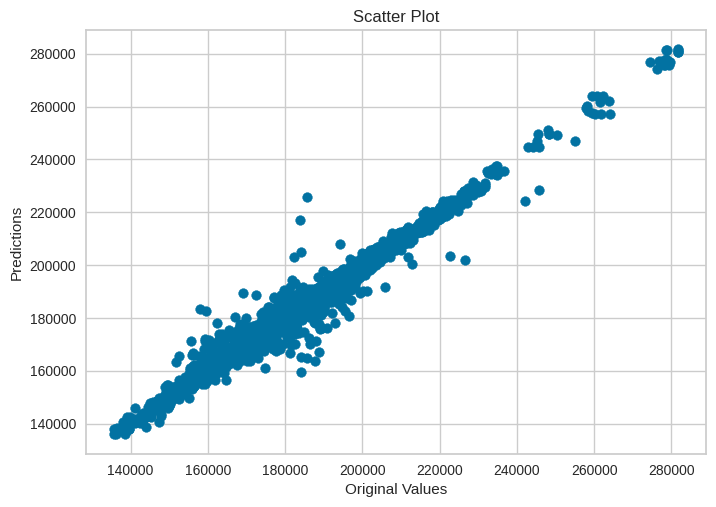


Mean Squared Error (MSE): 5448101.865813674
Mean Absolute Error (MAE): 1411.7093527251382
Coefficient of Determination (R2): 0.9806825380918724
Root Mean Squared Error (RMSE): 2334.1169349057204
Model effectiveness percentage: 98.07%


In [254]:
y_pred = model_KNN.predict(X_test)

df_predictions = pd.DataFrame({'Original Values': y_test, 'Predictions': y_pred})

print(df_predictions.head(10))
print()
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot')
plt.xlabel('Original Values')
plt.ylabel('Predictions')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print()
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model effectiveness percentage: {effectiveness:.2f}%")

## Random Forest

In [255]:
df4 = df_cloned.copy()
X = df4.drop('SalePrice', axis=1)
y = df4['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)

In [256]:
model_RandomF = RandomForestRegressor(n_estimators=175, max_depth=11, random_state=18)
model_RandomF.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, n_estimators=175, random_state=18)

      Original Values    Predictions
1132         168750.0  179722.399038
426          181465.0  179787.140602
1261         198295.0  187612.565805
1445         170317.0  168696.530704
1155         173172.0  176236.477753
377          173759.0  180059.405061
1039         156847.0  157096.576067
1112         196927.0  197138.215788
1129         160034.0  162675.769319
206          235708.0  233999.669435



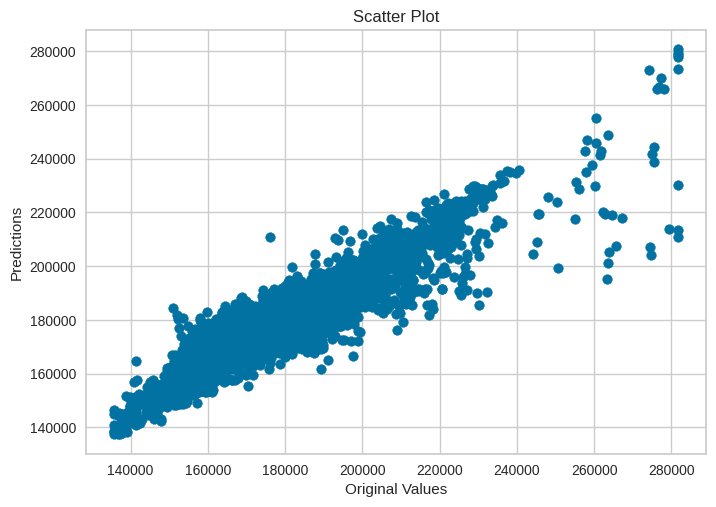


Mean Squared Error (MSE): 47238140.78116675
Mean Absolute Error (MAE): 4756.555949720733
Coefficient of Determination (R2): 0.8307026418682957
Root Mean Squared Error (RMSE): 6873.000857061401
Model effectiveness percentage: 83.07%


In [257]:
y_pred = model_RandomF.predict(X_test)

df_predictions = pd.DataFrame({'Original Values': y_test, 'Predictions': y_pred})

print(df_predictions.head(10))
print()
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot')
plt.xlabel('Original Values')
plt.ylabel('Predictions')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print()
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model effectiveness percentage: {effectiveness:.2f}%")

## Gradient Boosting Trees

In [258]:
df5 = df_cloned.copy()
X = df5.drop('SalePrice', axis=1)
y = df5['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [259]:
gbt_model = GradientBoostingRegressor(n_estimators=113, max_depth=6, random_state=42)
gbt_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=113, random_state=42)

      Original Values    Predictions
413          187640.0  175393.472094
514          153292.0  165499.743095
324          190587.0  184559.602057
228          181737.0  180121.271251
1171         204528.0  203363.443649
247          178095.0  182121.938439
683          181857.0  182512.892115
1248         175169.0  172675.051835
523          155028.0  158681.172983
508          174347.0  177987.295097



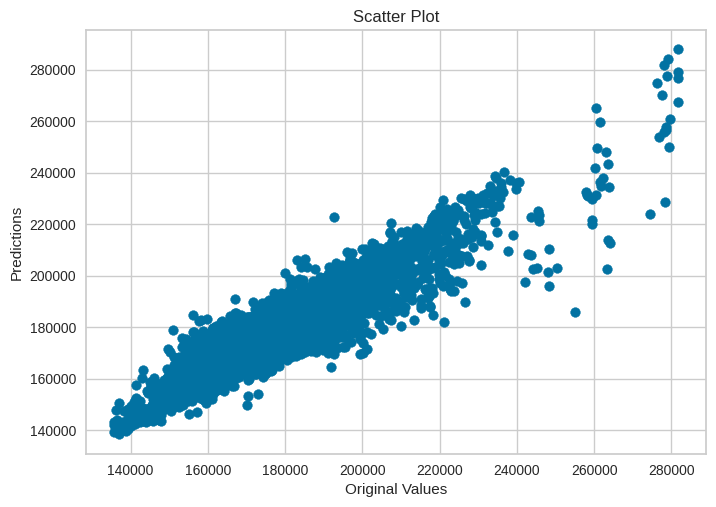


Mean Squared Error (MSE): 44559204.48366436
Mean Absolute Error (MAE): 4741.927811680603
Coefficient of Determination (R2): 0.8404130733150476
Root Mean Squared Error (RMSE): 6675.268120732258
Model effectiveness percentage: 84.04%


In [260]:
y_pred = gbt_model.predict(X_test)

df_predictions = pd.DataFrame({'Original Values': y_test, 'Predictions': y_pred})

print(df_predictions.head(10))
print()
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot')
plt.xlabel('Original Values')
plt.ylabel('Predictions')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print()
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model effectiveness percentage: {effectiveness:.2f}%")

## RNA / ANN

In [261]:
df6 = df_cloned.copy()
df6

X = df6.drop(['SalePrice'], axis=1)
y = df6['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [262]:

print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)


values = X_train.values
prices = y_train.values
values = values.reshape(-1, 14)
prices = prices.reshape(-1, 1)

Size of X_train: (18675, 14)
Size of y_train: (18675,)


In [263]:

input_layer = tf.keras.layers.Dense(units=64, input_shape=[14], activation='relu')
hidden_layer = tf.keras.layers.Dense(units=32, activation='relu')
output_layer = tf.keras.layers.Dense(units=1)
model_RNA = tf.keras.Sequential([input_layer, hidden_layer, output_layer])

model_RNA.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

history = model_RNA.fit(
    values,
    prices,
    epochs=50,
    batch_size=70,
    validation_split=0.4
)

Epoch 1/50
161/161 [==============================] - 2s 7ms/step - loss: 1290603008.0000 - val_loss: 201077280.0000
Epoch 2/50
161/161 [==============================] - 1s 6ms/step - loss: 187807072.0000 - val_loss: 273572352.0000
Epoch 3/50
161/161 [==============================] - 1s 6ms/step - loss: 200515264.0000 - val_loss: 333489024.0000
Epoch 4/50
161/161 [==============================] - 1s 6ms/step - loss: 200484832.0000 - val_loss: 255750928.0000
Epoch 5/50
161/161 [==============================] - 1s 7ms/step - loss: 210080256.0000 - val_loss: 188975488.0000
Epoch 6/50
161/161 [==============================] - 1s 5ms/step - loss: 188414224.0000 - val_loss: 183168416.0000
Epoch 7/50
161/161 [==============================] - 1s 5ms/step - loss: 205964560.0000 - val_loss: 288789280.0000
Epoch 8/50
161/161 [==============================] - 1s 5ms/step - loss: 206053472.0000 - val_loss: 178199536.0000
Epoch 9/50
161/161 [==============================] - 1s 6ms/step - los

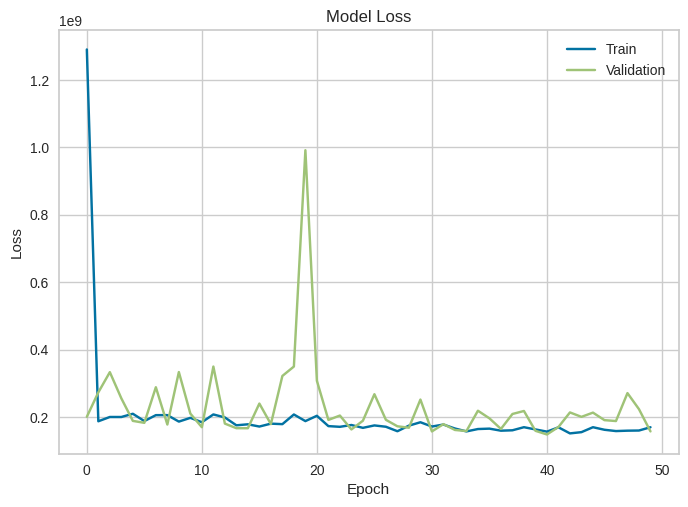

146/146 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 149618590.95298168
Mean Absolute Error (MAE): 8371.449591660821
Coefficient of Determination (R2): 0.4590115780253249
Root Mean Squared Error (RMSE): 12231.867843995931
Model effectiveness percentage: 45.90%


In [264]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

pred1 = model_RNA.predict(X_test)
mse = mean_squared_error(y_test, pred1)
mae = mean_absolute_error(y_test, pred1)
r2 = r2_score(y_test, pred1)
rmse = np.sqrt(mse)
effectiveness = r2 * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model effectiveness percentage: {effectiveness:.2f}%")


Los modelos supervisados con mejores resultados son KNN, Random Forest y Gradient Boosting Trees. Estos serán los modelos que se van a utilizar en la fase de optimización.

## Isolation Forest

Crearemos un dataset eliminando ligeramente los valores atípicos de nuestro dataset ya trabajado en data mining para clasificar las diferentes casas por clusters, utilizando los modelos no supervisados, de modo que estos ofrezcan resultados más óptimos.

In [265]:
df7 = df.copy()

In [266]:
def plot_anomalies_if(df, column):
    X = df[[column, "SalePrice"]]

    c = [0.01, 0.025]
    results = []

    for i in range(len(c)):
        clf = IsolationForest(contamination=c[i], random_state=1)
        clf.fit(X)
        results.append(clf.predict(X))

    # Plot data
    plt.set_cmap('jet')
    fig = plt.figure(figsize=(15, 5))
    for i in range(len(c)):
        ax = fig.add_subplot(1, len(c), i+1)
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=results[i], marker='x', s=500, alpha=0.6)
        ax.set_title(f'Contamination {c[i]}')
        ax.set_xlabel(column)
        ax.set_ylabel('SalePrice')

    plt.show()

In [267]:
for col in df7.columns:
  plot_anomalies_if(df7, col)
  print()

Output hidden; open in https://colab.research.google.com to view.

In [268]:
def remove_anomalies(df, columns):
    anomalous_indices = set()
    for column in columns:
        X = df[[column, "SalePrice"]]
        clf = IsolationForest(contamination=0.01, random_state=1)
        clf.fit(X)
        anomalous_indices.update(df.index[clf.predict(X) == -1])
    anomalous_indices = sorted(anomalous_indices)
    df_clean = df.drop(anomalous_indices)

    return df_clean, anomalous_indices

In [269]:
columns = df7.columns
df_clean, anomalies = remove_anomalies(df7, columns)
df7 = df_clean

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3

In [270]:
df7

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11622.000000,896.0,0.0,896.0,0.0,1.0,0,2.0,1,5,1961,1961,730.0,1,169277.052498
1,14267.000000,1329.0,0.0,1329.0,36.0,1.0,1,3.0,1,6,1958,1958,312.0,1,187758.393989
2,13830.000000,928.0,701.0,1629.0,34.0,2.0,1,3.0,1,6,1997,1998,482.0,1,183583.683570
3,9978.000000,926.0,678.0,1604.0,36.0,2.0,1,3.0,1,7,1998,1998,470.0,1,179317.477511
4,5005.000000,1280.0,0.0,1280.0,82.0,2.0,0,2.0,1,5,1992,1992,506.0,1,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936.000000,546.0,546.0,1092.0,0.0,1.0,1,3.0,1,5,1970,1970,0.0,1,167081.220949
1455,1894.000000,546.0,546.0,1092.0,24.0,1.0,1,3.0,1,6,1970,1970,286.0,1,164788.778231
1456,6799.295826,1224.0,0.0,1224.0,0.0,1.0,0,4.0,1,7,1960,1996,576.0,1,219222.423400
1457,10441.000000,970.0,0.0,970.0,32.0,1.0,0,3.0,1,6,1992,1992,0.0,1,184924.279659


In [271]:
print(f"Removed {len(anomalies)} anomalous rows")

Removed 62 anomalous rows


## K-Means

In [272]:
df8 = df7.copy()
df8 = df8.astype(int)
df9 = df7.copy()
df9 = df9.astype(int)

In [273]:
columns = df8.columns

scaler = MinMaxScaler()

df8[columns] = scaler.fit_transform(df8[columns])
df8

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,0.700642,0.281724,0.0000,0.175119,0.000000,0.0,0.0,0.2,0.0,0.222222,0.625954,0.183333,0.741870,1.0,0.353603
1,0.883295,0.544627,0.0000,0.362809,0.240000,0.0,0.5,0.4,0.0,0.333333,0.603053,0.133333,0.317073,1.0,0.578318
2,0.853118,0.301154,0.5608,0.492848,0.226667,0.5,0.5,0.4,0.0,0.333333,0.900763,0.800000,0.489837,1.0,0.527553
3,0.587114,0.299939,0.5424,0.482011,0.240000,0.5,0.5,0.4,0.0,0.444444,0.908397,0.800000,0.477642,1.0,0.475682
4,0.243699,0.514876,0.0000,0.341569,0.546667,0.5,0.0,0.2,0.0,0.222222,0.862595,0.700000,0.514228,1.0,0.128085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.031766,0.069217,0.4368,0.260078,0.000000,0.0,0.5,0.4,0.0,0.222222,0.694656,0.333333,0.000000,1.0,0.326901
1455,0.028865,0.069217,0.4368,0.260078,0.160000,0.0,0.5,0.4,0.0,0.333333,0.694656,0.333333,0.290650,1.0,0.299020
1456,0.367585,0.480874,0.0000,0.317295,0.000000,0.0,0.0,0.6,0.0,0.444444,0.618321,0.766667,0.585366,1.0,0.960896
1457,0.619087,0.326655,0.0000,0.207195,0.213333,0.0,0.0,0.4,0.0,0.333333,0.862595,0.700000,0.000000,1.0,0.543858


In [274]:
df9

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730,1,169277
1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312,1,187758
2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482,1,183583
3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470,1,179317
4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506,1,150730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,546,546,1092,0,1,1,3,1,5,1970,1970,0,1,167081
1455,1894,546,546,1092,24,1,1,3,1,6,1970,1970,286,1,164788
1456,6799,1224,0,1224,0,1,0,4,1,7,1960,1996,576,1,219222
1457,10441,970,0,970,32,1,0,3,1,6,1992,1992,0,1,184924


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(1, 12))>

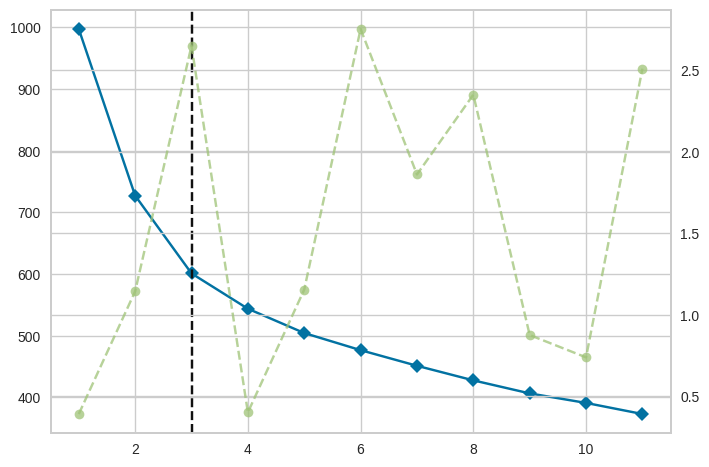

In [275]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df8)
visualizer.show

In [276]:
print("\nThe optimal number of clusters is:", visualizer.elbow_value_)


The optimal number of clusters is: 3


In [277]:
kmeans_3k = KMeans(n_clusters=3, random_state=42)
kmeans_3k.fit(df8)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [278]:
labels = kmeans_3k.labels_
centroids = kmeans_3k.cluster_centers_

df9['Cluster'] = labels
df9

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice,Cluster
0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730,1,169277,0
1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312,1,187758,0
2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482,1,183583,2
3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470,1,179317,2
4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506,1,150730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,546,546,1092,0,1,1,3,1,5,1970,1970,0,1,167081,0
1455,1894,546,546,1092,24,1,1,3,1,6,1970,1970,286,1,164788,0
1456,6799,1224,0,1224,0,1,0,4,1,7,1960,1996,576,1,219222,0
1457,10441,970,0,970,32,1,0,3,1,6,1992,1992,0,1,184924,0


In [279]:
silhouette_avg = silhouette_score(df8, kmeans_3k.labels_)
print("Average Silhouette Coefficient:", silhouette_avg)
print(f"Silhouette percentage: {(silhouette_avg * 100).round(2)}%" )

Average Silhouette Coefficient: 0.25650034481213474
Silhouette percentage: 25.65%


In [280]:

fig = px.scatter_3d(df9, x='Cluster', y='GrLivArea', z='SalePrice', color=kmeans_3k.labels_, opacity=0.7, width=800, height=600)
fig.update_layout(title='K-Means Clustering 3D')
fig.show()

In [281]:
columns = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'OpenPorchSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'Paved']
characteristic = df9[columns]

for col in characteristic.columns:
    fig = px.scatter_3d(df9, x='Cluster', y=characteristic[col], z='SalePrice', color=kmeans_3k.labels_, opacity=0.7, width=800, height=600)
    fig.update_layout(title=f'K-Means Clustering 3D - {col}', scene=dict(xaxis_title='Cluster', yaxis_title=col, zaxis_title='Sale Price'))
    fig.show()


## DBSCAN

In [282]:
df10 = df7.copy()
df10 = df10.astype(int)
df10

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730,1,169277
1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312,1,187758
2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482,1,183583
3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470,1,179317
4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506,1,150730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,546,546,1092,0,1,1,3,1,5,1970,1970,0,1,167081
1455,1894,546,546,1092,24,1,1,3,1,6,1970,1970,286,1,164788
1456,6799,1224,0,1224,0,1,0,4,1,7,1960,1996,576,1,219222
1457,10441,970,0,970,32,1,0,3,1,6,1992,1992,0,1,184924


In [283]:
features = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'OpenPorchSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageArea']
X = df10[features].values
X_normalized = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(X_normalized)

df10['Cluster'] = clusters


In [284]:
df10["Cluster"].value_counts()

Cluster
 0    781
 1    437
-1    162
 2     13
 3      4
Name: count, dtype: int64

In [285]:
features = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'OpenPorchSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageArea']
for feature in features:
    fig = px.scatter_3d(df10, x=feature, y="Cluster", z="SalePrice", color=clusters, color_continuous_scale='viridis', labels={'color': 'Cluster'})
    fig.update_layout(title=f'DBSCAN Clustering - {feature}', scene=dict(xaxis_title=feature, yaxis_title="Cluster", zaxis_title="SalePrice"))
    fig.show()

Los modelos no supervisados, como DBSCAN y K-Means, ofrecen gráficos que son esenciales para el análisis de casas por agrupación. Estos gráficos revelan patrones en datos como el tamaño de la propiedad, el precio de venta y las características de las habitaciones. Esto ayuda a identificar segmentos de mercado, analizar tendencias de precios y entender las preferencias de los compradores, facilitando así la toma de decisiones informadas en el sector inmobiliario.

# Parte 4 (Optimización de Modelos Supervisados)

Se optimizarán los modelos supervisados para lograr porcentajes de efectividad mayores al 80%, con el objetivo de obtener los resultados más óptimos y realizar predicciones precisas.

Modelos a optimizar:
* KNN
* Random Forest
* Gradient Boosting Trees

In [286]:
df11 = df_cloned.copy()
df11

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11613.0,900.0,0.0,900.0,0.0,1.0,0,1.0,1,5,1974,1950,732.0,1,168962.0
1,14306.0,1338.0,0.0,1338.0,35.0,1.0,1,3.0,1,6,1964,1950,313.0,1,188531.0
2,13913.0,935.0,701.0,1636.0,33.0,1.0,1,3.0,1,6,1994,2009,477.0,1,183114.0
3,9942.0,922.0,674.0,1596.0,36.0,1.0,1,2.0,1,7,2004,2010,472.0,1,179705.0
4,4991.0,1270.0,0.0,1270.0,82.0,2.0,0,2.0,1,4,1982,2005,501.0,1,150517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1931.0,543.0,540.0,1083.0,0.0,1.0,1,2.0,1,3,1950,1996,0.0,1,165644.0
1455,1866.0,541.0,538.0,1079.0,21.0,1.0,1,1.0,1,5,1954,2001,280.0,1,164801.0
1456,6748.0,1242.0,0.0,1242.0,0.0,1.0,0,2.0,1,6,1974,1996,588.0,1,220412.0
1457,10415.0,966.0,0.0,966.0,29.0,1.0,0,1.0,1,3,2010,2005,0.0,1,182362.0


In [287]:
X = df11.drop('SalePrice', axis=1)
y = df11['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## KNN (Optimizado)

Rango promedio de porcentajes: De 97% a 99%

Mejor Porcentaje de Efectividad Obtenido: 98.48%


      Original Values  Predictions
1160         186688.0     186700.0
99           161042.0     159752.0
1427         174418.0     174884.0
811          193634.0     194233.5
350          192978.0     193486.5
432          179643.0     180341.0
1201         182200.0     182182.5
748          209752.0     209342.0
1437         195594.0     196341.0
271          176265.0     174064.5



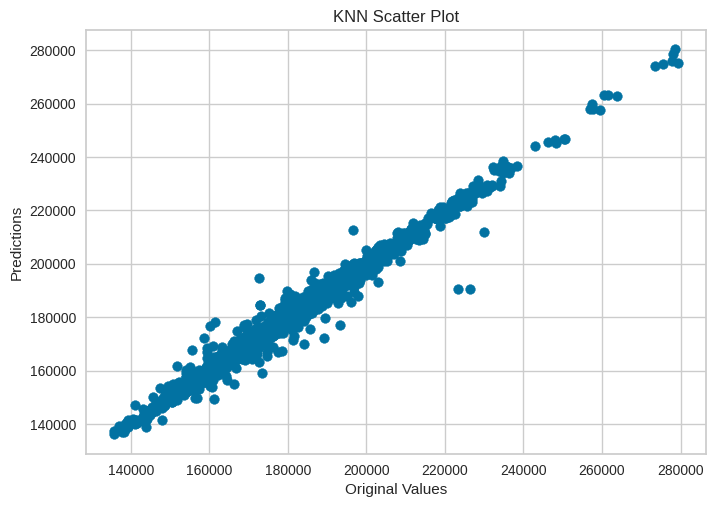

Mean Squared Error (MSE): 4199817.414210404
Mean Absolute Error (MAE): 1294.082675030878
Coefficient of Determination (R2): 0.9848143697850393
Root Mean Squared Error (RMSE): 2049.3456063364238
Model Effectiveness Percentage: 98.48%


In [288]:
model_KNN = KNeighborsRegressor(n_neighbors=2)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

df_predictions = pd.DataFrame({'Original Values': y_test, 'Predictions': y_pred})

print(df_predictions.head(10))
print()
plt.scatter(y_test, y_pred)
plt.title('KNN Scatter Plot')
plt.xlabel('Original Values')
plt.ylabel('Predictions')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
effectiveness = r2 * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")


## Random Forest (Optimizado)
Rango promedio de porcentajes: De 94% a 96%
Porcentaje de Efectividad: 95.01%

      Original Values    Predictions
1160         186688.0  187177.025862
99           161042.0  168837.839080
1427         174418.0  175096.712644
811          193634.0  195322.491379
350          192978.0  180860.106322
432          179643.0  182578.313218
1201         182200.0  181608.813218
748          209752.0  207634.270115
1437         195594.0  201975.298851
271          176265.0  178093.120690



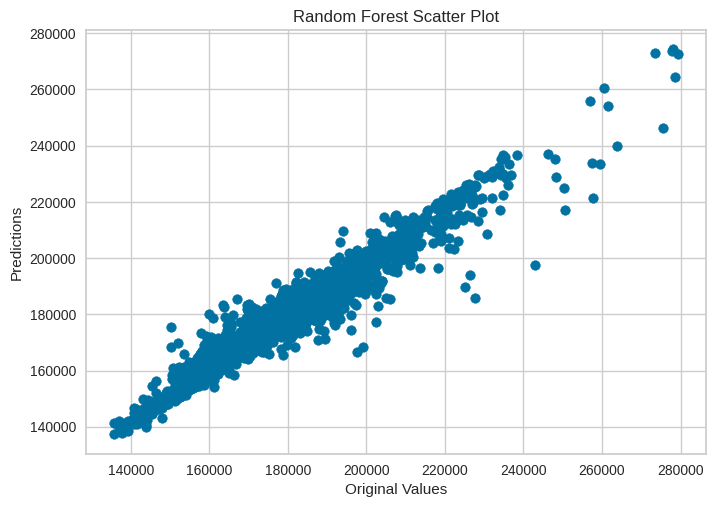

Mean Squared Error (MSE): 14414744.662708377
Mean Absolute Error (MAE): 2282.031639414595
Coefficient of Determination (R2): 0.9478794051021567
Root Mean Squared Error (RMSE): 3796.675475031857
Model Effectiveness Percentage: 94.79%


In [565]:
model_RandomF = RandomForestRegressor(n_estimators=348, max_depth=35, random_state=2)
model_RandomF.fit(X_train, y_train)
y_pred = model_RandomF.predict(X_test)

df_predictions = pd.DataFrame({'Original Values': y_test, 'Predictions': y_pred})

print(df_predictions.head(10))
print()
plt.scatter(y_test, y_pred)
plt.title('Random Forest Scatter Plot')
plt.xlabel('Original Values')
plt.ylabel('Predictions')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
effectiveness = r2 * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

## Gradient Boosting Trees (Optimizado)

Rango promedio de porcentajes: De 94% a 96%

Porcentaje de Efectividad: 95.93%

      Original Values    Predictions
1160         186688.0  187563.936857
99           161042.0  163569.661037
1427         174418.0  174915.924867
811          193634.0  194040.656415
350          192978.0  184078.089941
432          179643.0  182505.933195
1201         182200.0  181118.946221
748          209752.0  206397.973326
1437         195594.0  199057.599653
271          176265.0  177586.784153



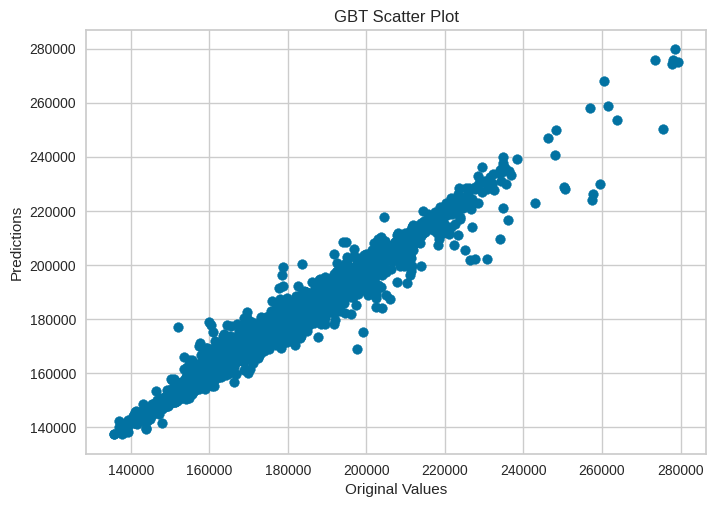

Mean Squared Error (MSE): 11422759.133732386
Mean Absolute Error (MAE): 2162.456342474099
Coefficient of Determination (R2): 0.9586977768003666
Root Mean Squared Error (RMSE): 3379.7572595872007
Model Effectiveness Percentage: 95.87%


In [566]:
gbt_model = GradientBoostingRegressor(n_estimators=400, max_depth=10, random_state=2)
gbt_model.fit(X_train, y_train)
y_pred = gbt_model.predict(X_test)

df_predictions = pd.DataFrame({'Original Values': y_test, 'Predictions': y_pred})

print(df_predictions.head(10))
print()
plt.scatter(y_test, y_pred)
plt.title('GBT Scatter Plot')
plt.xlabel('Original Values')
plt.ylabel('Predictions')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
effectiveness = r2 * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

# Pruebas Finales y Conclusión
Se realizarán pruebas de predicciones para poner en práctica los modelos y mostrar ejemplos de su uso. Estos ejemplos demostrarán la capacidad predictiva y la eficacia de los modelos entrenados.

Al final de estas pruebas, se evaluará la precisión y la robustez de cada modelo. Se discutirán las fortalezas y debilidades observadas durante las pruebas, y se ofrecerán recomendaciones para futuras mejoras. Esta conclusión permitirá una comprensión clara del desempeño de los modelos y de cómo pueden ser aplicados eficazmente en escenarios del mundo real para la predicción de precios de viviendas.

## Prueba con el DataSet Trabajado en DataMining

In [539]:
df_test1 = df.copy()
#df_test1 = df_test1.sample(2)
df_test1

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11622.000000,896.0,0.0,896.0,0.0,1.0,0,2.0,1,5,1961,1961,730.0,1,169277.052498
1,14267.000000,1329.0,0.0,1329.0,36.0,1.0,1,3.0,1,6,1958,1958,312.0,1,187758.393989
2,13830.000000,928.0,701.0,1629.0,34.0,2.0,1,3.0,1,6,1997,1998,482.0,1,183583.683570
3,9978.000000,926.0,678.0,1604.0,36.0,2.0,1,3.0,1,7,1998,1998,470.0,1,179317.477511
4,5005.000000,1280.0,0.0,1280.0,82.0,2.0,0,2.0,1,5,1992,1992,506.0,1,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936.000000,546.0,546.0,1092.0,0.0,1.0,1,3.0,1,5,1970,1970,0.0,1,167081.220949
1455,1894.000000,546.0,546.0,1092.0,24.0,1.0,1,3.0,1,6,1970,1970,286.0,1,164788.778231
1456,6799.295826,1224.0,0.0,1224.0,0.0,1.0,0,4.0,1,7,1960,1996,576.0,1,219222.423400
1457,10441.000000,970.0,0.0,970.0,32.0,1.0,0,3.0,1,6,1992,1992,0.0,1,184924.279659


In [540]:
X1 = df_test1.drop('SalePrice', axis=1)
test1_original_prices = df_test1['SalePrice']
pred1 = model_KNN.predict(X1)
pred2 = model_RandomF.predict(X1)
pred3 = gbt_model.predict(X1)

df_pred_test1 = pd.DataFrame({
    'Original Values': test1_original_prices,
    'KNN Predictions': pred1,
    'RandomF Predictions': pred2,
    'GBT Predictions': pred3})

df_pred_test1.head()

,Original Values,KNN Predictions,RandomF Predictions,GBT Predictions
0,169277.052498,169070.0,184872.250000,183024.148305
1,187758.393989,189559.0,189914.227011,188564.737781
2,183583.683570,182447.5,187486.959770,183662.728811
3,179317.477511,181327.0,181300.673851,184410.991259
4,150730.079977,150077.5,161256.333333,162852.628895


### Métricas

In [541]:
mse = mean_squared_error(test1_original_prices, pred1)
mae = mean_absolute_error(test1_original_prices, pred1)
r2 = r2_score(test1_original_prices, pred1)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print("Metrics for KNN Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")


Metrics for KNN Model
Mean Squared Error (MSE): 3292351.274474657
Mean Absolute Error (MAE): 1325.7244966647695
Coefficient of Determination (R2): 0.9879253910527258
Root Mean Squared Error (RMSE): 1814.4837487491193
Model Effectiveness Percentage: 98.79%


In [542]:
mse = mean_squared_error(test1_original_prices, pred2)
mae = mean_absolute_error(test1_original_prices, pred2)
r2 = r2_score(test1_original_prices, pred2)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print("Metrics for Random Forest Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

Metrics for Random Forest Model
Mean Squared Error (MSE): 61652259.17276131
Mean Absolute Error (MAE): 4862.497603867506
Coefficient of Determination (R2): 0.7738920126784236
Root Mean Squared Error (RMSE): 7851.895259920455
Model Effectiveness Percentage: 77.39%


In [543]:
mse = mean_squared_error(test1_original_prices, pred3)
mae = mean_absolute_error(test1_original_prices, pred3)
r2 = r2_score(test1_original_prices, pred3)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print("Metrics for GBT Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

Metrics for GBT Model
Mean Squared Error (MSE): 58237143.30448413
Mean Absolute Error (MAE): 4723.9763799904185
Coefficient of Determination (R2): 0.7864168574417326
Root Mean Squared Error (RMSE): 7631.32644462836
Model Effectiveness Percentage: 78.64%


## Prueba con el DataSet Raw

In [544]:
df_test2 = original_df[['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'OpenPorchSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'Street', 'SalePrice']]

In [545]:
df_test2.loc[:, 'GarageArea'] = df_test2['GarageArea'].fillna(0)

df_test2.loc[:, 'Street'] = df_test2['Street'].replace({'Pave': 1, 'Grvl': 0})

df_test2 = df_test2.rename(columns={'Street': 'Paved'})

paved_counts = df_test2['Paved'].value_counts()

In [546]:
#df_test2 = df_test2.sample(2)
df_test2

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved,SalePrice
0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730.0,1,169277.052498
1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312.0,1,187758.393989
2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482.0,1,183583.683570
3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470.0,1,179317.477511
4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506.0,1,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,546,546,1092,0,1,1,3,1,5,1970,1970,0.0,1,167081.220949
1455,1894,546,546,1092,24,1,1,3,1,6,1970,1970,286.0,1,164788.778231
1456,20000,1224,0,1224,0,1,0,4,1,7,1960,1996,576.0,1,219222.423400
1457,10441,970,0,970,32,1,0,3,1,6,1992,1992,0.0,1,184924.279659


In [547]:
X2 = df_test2.drop('SalePrice', axis=1)
test2_original_prices = df_test2['SalePrice']
pred1 = model_KNN.predict(X2)
pred2 = model_RandomF.predict(X2)
pred3 = gbt_model.predict(X2)

df_pred_test2 = pd.DataFrame({
    'Original Values': test2_original_prices,
    'KNN Predictions': pred1,
    'RandomF Predictions': pred2,
    'GBT Predictions': pred3})

df_pred_test2.head()


,Original Values,KNN Predictions,RandomF Predictions,GBT Predictions
0,169277.052498,169070.0,184872.250000,183024.148305
1,187758.393989,189559.0,189914.227011,188564.737781
2,183583.683570,182447.5,187486.959770,183662.728811
3,179317.477511,181327.0,181300.673851,184410.991259
4,150730.079977,150077.5,161256.333333,162852.628895


### Métricas

In [548]:
mse = mean_squared_error(test2_original_prices, pred1)
mae = mean_absolute_error(test2_original_prices, pred1)
r2 = r2_score(test2_original_prices, pred1)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print("Metrics for KNN Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

Metrics for KNN Model
Mean Squared Error (MSE): 69280477.91185564
Mean Absolute Error (MAE): 3127.4648746384946
Coefficient of Determination (R2): 0.7459157274767388
Root Mean Squared Error (RMSE): 8323.489527347027
Model Effectiveness Percentage: 74.59%


In [549]:
mse = mean_squared_error(test2_original_prices, pred2)
mae = mean_absolute_error(test2_original_prices, pred2)
r2 = r2_score(test2_original_prices, pred2)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print("Metrics for Random Forest Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

Metrics for Random Forest Model
Mean Squared Error (MSE): 69385935.03730246
Mean Absolute Error (MAE): 5313.2073501530085
Coefficient of Determination (R2): 0.7455289663311873
Root Mean Squared Error (RMSE): 8329.82202914939
Model Effectiveness Percentage: 74.55%


In [550]:
mse = mean_squared_error(test2_original_prices, pred3)
mae = mean_absolute_error(test2_original_prices, pred3)
r2 = r2_score(test2_original_prices, pred3)
rmse = np.sqrt(mse)
effectiveness = r2 * 100
print("Metrics for GBT Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Model Effectiveness Percentage: {effectiveness:.2f}%")

Metrics for GBT Model
Mean Squared Error (MSE): 67295187.99185863
Mean Absolute Error (MAE): 5154.72932384298
Coefficient of Determination (R2): 0.7531967243790983
Root Mean Squared Error (RMSE): 8203.364431247623
Model Effectiveness Percentage: 75.32%


## Prueba Personalizada

Prueba los resultados basados en las características que proporciones.

In [563]:

# Set your characteristics
lotarea = 8000  # LotArea in square feet
firstflrsf = 1200  # First floor square feet
secondflrsf = 100  # Second floor square feet
grlivarea = 1300  # Above grade (ground) living area square feet
openporchsf = 50  # Open porch area in square feet
fullbath = 2  # Number of full bathrooms
halfbath = 1  # Number of half bathrooms
bedroomabvgr = 3  # Number of bedrooms above grade (does NOT include basement bedrooms)
kitchenabvgr = 1  # Number of kitchens
tormsabvgr = 6  # Total rooms above grade (does not include bathrooms)
yearbuilt = 1990  # Original construction date
yearremoadd = 1990  # Remodel date (same as construction date if no remodeling or additions)
garagearea = 250  # Garage area in square feet
paved = 1  # Indicator for paved street (1 for paved, 0 for not paved)

df_custom_test = pd.DataFrame({
    'LotArea': [lotarea],
    '1stFlrSF': [firstflrsf],
    '2ndFlrSF': [secondflrsf],
    'GrLivArea': [grlivarea],
    'OpenPorchSF': [openporchsf],
    'FullBath': [fullbath],
    'HalfBath': [halfbath],
    'BedroomAbvGr': [bedroomabvgr],
    'KitchenAbvGr': [kitchenabvgr],
    'TotRmsAbvGrd': [tormsabvgr],
    'YearBuilt': [yearbuilt],
    'YearRemodAdd': [yearremoadd],
    'GarageArea': [garagearea],
    'Paved': [paved]
})

df_custom_test

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Paved
0,8000,1200,100,1300,50,2,1,3,1,6,1990,1990,250,1


In [564]:
X3 = df_custom_test
pred1 = model_KNN.predict(X3)
pred2 = model_RandomF.predict(X3)
pred3 = gbt_model.predict(X3)

df_pred_custom = pd.DataFrame({
    'KNN Predictions': pred1,
    'RandomF Predictions': pred2,
    'GBT Predictions': pred3})

df_pred_custom.head()


,KNN Predictions,RandomF Predictions,GBT Predictions
0,177875.0,180086.020115,178314.805558


## Conclusión Final
En conclusión, este proyecto busca proporcionar herramientas que faciliten a las personas o compañías que trabajan en el sector inmobiliario y de bienes raíces determinar cómo diversas características relacionadas pueden influir en los precios de las propiedades. Esto evita recurrir a métodos convencionales y prácticamente obsoletos para obtener o predecir información, como en este caso el precio de las casas. Los modelos desarrollados ofrecen resultados muy precisos, superando el 75% de efectividad en datos crudos y obteniendo resultados de alrededor del 98% en datos limpios. Además, presentan valores de Error Cuadrático Medio relativamente bajos, lo cual es crucial a la hora de tomar decisiones basadas en datos confiables.

Es importante destacar que los datos utilizados en este proyecto son parte de una muestra limitada de casas, por lo que los resultados obtenidos pueden variar dependiendo de la ubicación y el estado actual del mercado. No obstante, este proyecto busca demostrar que mediante un buen tratamiento de los datos y el uso de modelos predictivos adecuados, es posible obtener resultados muy útiles y precisos para la toma de decisiones en el sector inmobiliario y de bienes raíces.

Además de ofrecer herramientas para analizar y predecir precios en el mercado inmobiliario, este proyecto resalta la importancia de la tecnología y el análisis de datos en la toma de decisiones informadas. Al utilizar modelos avanzados de aprendizaje automático como el KNN, Random Forest y Gradient Boosting Trees, se logra una precisión notable en la predicción de precios, lo que a su vez permite a las empresas y profesionales del sector inmobiliario optimizar sus estrategias de precios, identificar oportunidades de inversión y ofrecer un servicio más eficiente a sus clientes.

Otro aspecto relevante es la capacidad de adaptación de estos modelos a diferentes condiciones del mercado y tipos de propiedades. Si bien los resultados pueden variar según la ubicación geográfica y las condiciones económicas, la metodología y el enfoque analítico utilizados en este proyecto son escalables y pueden aplicarse a conjuntos de datos más amplios y diversos.

Finalmente, este proyecto no solo ofrece herramientas técnicas para el análisis de precios de viviendas, sino que también resalta el potencial de la tecnología para transformar y mejorar la industria inmobiliaria. Proporciona insights valiosos que pueden impulsar la toma de decisiones estratégicas y mejorar la experiencia tanto para los compradores como para los vendedores en el mercado de bienes raíces.


# FIN DEL CUARDERNO